### Boom Bikes - Bike sharing Multiple Linear Regression Assignment

###  1. Problem Statement & Business Objective

**Problem Statement:**

BoomBikes is in the business of Bike Sharing where the business rents the bikes for a price or free. Due to ongoing Corona pandemic the business has sufferred. So, the company has decided to come up with a business plan which will help revive revenues and make profit. So, the compnay wants to know the factors which affect the demand for the shared bikes in American market. 

**Business  Objective:**

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

**Key Result Area**|
1. To model the demand for shared bikes with the available independent variables. 
2. The model should help to understand how exactly the demands vary with different features. 
3. The model may help management to understand the demand dynamics of a new market. 

### 2. Libraries

In [96]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)
from sklearn.model_selection import train_test_split

In [97]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
bike = pd.DataFrame(pd.read_csv("day.csv"))

### 3. Data Understanding

In [99]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [100]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [101]:
#columns in data
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Data Insights**

- Dataset has 730 rows and 16 columns 
- Columns with float dtype =4 , Colunms with date time object type =1, Others are integer


In [102]:
#details of numeric data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [103]:
# datatypes of data
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### 3. Data cleaning

#### 3.1 Check missing or null values and remove/impute, if any

In [104]:
#check the Null value 
round(bike.isnull().sum()/len(bike)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**Observation: no column has missing/null values**

#### 3.2 Remove the columns which may not conribute in further analysis

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

**instant** : Its only an index value

**casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.


In [106]:
#instant column can be dropped as it is an index.
bike =bike.drop(columns=['instant'])

KeyError: "['instant'] not found in axis"

In [107]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [108]:
bike =bike.drop(columns=['casual'])
bike =bike.drop(columns=['registered'])

#### 3.3 Data preparation: 

**Deriving Date value from the dteday column**

**dteday** : This column has the date, Since we already have seperate columns for 'year' & 'month',hence, we can extract the date value and rename column to 'date'.

In [109]:
#derived column: "date", extract date which can be used as day of the month
bike['dteday'] =bike['dteday'].apply(lambda x: int(x.split('-')[0]))
bike = bike.rename(columns={"dteday": "date"})

**Data Preparation:**

Problem statement has clear instructions to -
- convert **weathersit** and **season** to specific string value as mentioned in data dictionary.
- not to drop **yr** column.

In [110]:
# weathersit variable
bike.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [111]:
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [112]:
# season variable
bike.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

**season variable**

As per Data dictionary, season is categorical variable which can take values as follows
season : 
    1:spring, 2:summer, 3:fall, 4:winter

Mapping 
 -  1 -> spring 
 -  2 -> summer
 -  3 -> fall 
 -  4 -> winter
 
 Similarly, we will also convert **weekday** and **month** columns as follows
 - weekday (0 -> Sunday, 1 -> Monday,2 -> Tuesday, 3 -> Wednesday,4 -> Thursday,5 -> Friday,6 -> Saturday)
 - month (1 -> jan, 2 -> feb, 3 -> march, 4 -> april, 5 -> may, 6 -> june, 7 -> july, 8 -> aug, 9 -> sept, 10 -> oct, 11 -> nov, 12 -> dec)

In [113]:
#converting season column
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [114]:
#converting weekday column
bike['weekday']=bike['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [115]:
# converting month column
bike['mnth']=bike['mnth'].map({1: 'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

In [116]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [117]:
bike.shape

(730, 13)

After data cleaning, data set has 13 columns and 730 rows

#### 3.4 Univariate analysis

**Numeric variables and box plot**

Considering only float dtype as Numeric variables as some other integer columns are basically classifications


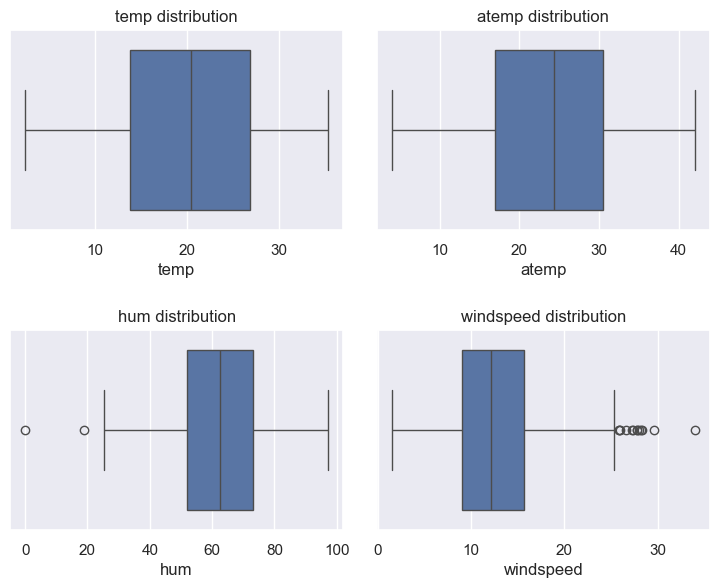

In [118]:
#boxplots
bike_num_col=['temp','atemp','hum','windspeed']
plt.figure(figsize=(10, 10))
i=1
for col in bike_num_col:
    plt.subplot(2,2,i)
    sns.boxplot(data=bike, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.subplots_adjust(left=0.2,bottom=0.5,right=0.9,top=1,wspace=0.1, hspace=0.5)
plt.show()

**Insights**

- Temp variable: temp variable seems normal and there are no outliers.
- atemp variable: atemp variable also seems normal and there are no outliers.
- hum variable: Analysis is required for 0 and 20 as they seem to be outliers.
- windspeed variable: windspeed distribution seem to be valid and there is no need to drop any instance. 

#### 3.5 Handling outliers values

In [119]:
# analyze outlier values in humidity:

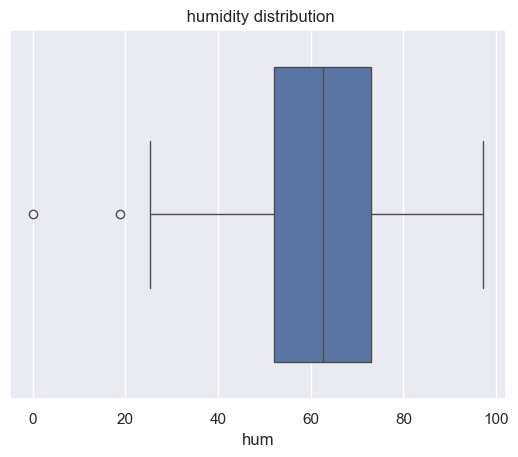

In [120]:
# box plot of humidity variable:
sns.boxplot(data=bike, x='hum')
plt.title(" humidity distribution")
plt.show()

In [121]:
#checking rows where humidity is zero.
bike[bike['hum'] == 0]

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,10,spring,0,march,0,Thursday,1,light,15.952731,19.2834,0.0,17.545759,623


In [122]:
# check humidity in other rows.
bike[(bike.index < (68+10)) & (bike.index > (68-10))].hum

59    53.5000
60    44.9583
61    31.8333
62    61.0417
63    78.9167
64    94.8261
65    55.1304
66    42.0833
67    77.5417
68     0.0000
69    64.9565
70    59.4583
71    52.7391
72    49.6957
73    65.5652
74    77.6522
75    60.2917
76    52.5217
77    37.9167
Name: hum, dtype: float64

In [123]:
#impute the mean value for humidity in this instance as it seems that 0 humidity is incorrect. 
bike['hum']=bike['hum'].replace(0,bike.hum.mean())

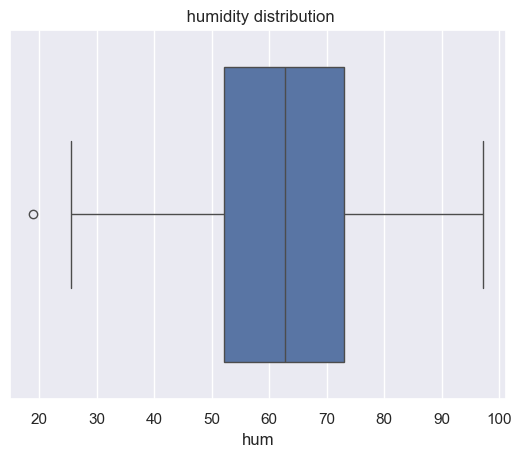

In [124]:
# recheking humidity value by boxplot
sns.boxplot(data=bike, x='hum')
plt.title(" humidity distribution")
plt.show()

In [125]:
# we imputed mean value in humidity column. there is no zero values now in humidity column.

#### 3.6 EDA

- Check linear relation of numeric variable:

- EDA of numeric variables: plot pairplot of numeric variable 

In [126]:
bike_num_col=['temp','atemp','hum','windspeed','cnt']

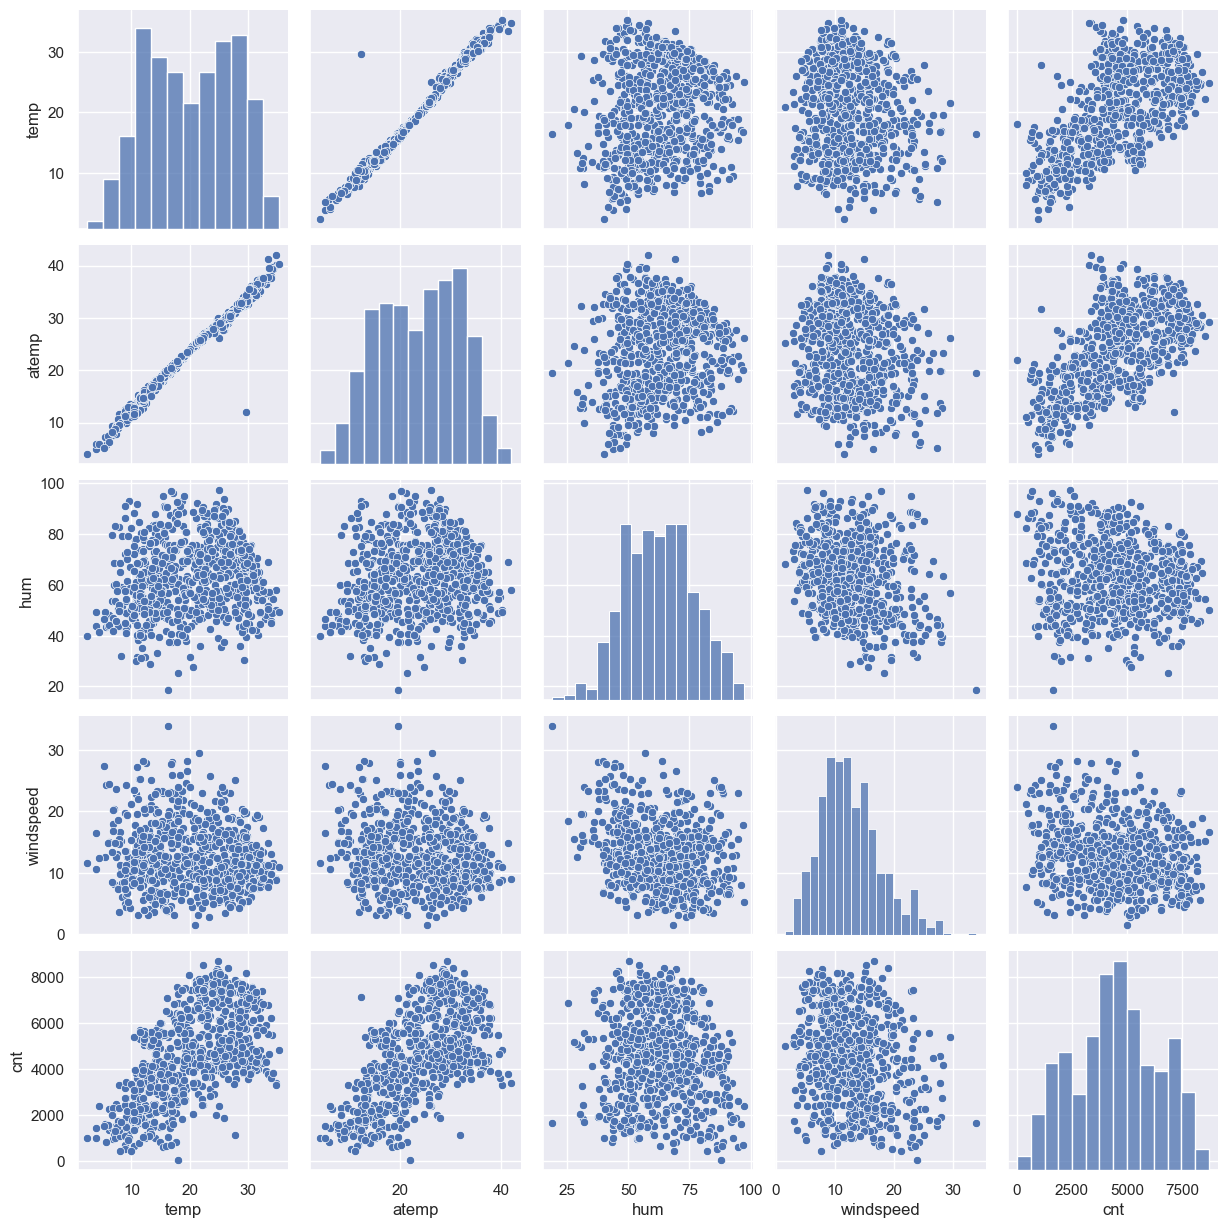

In [127]:
sns.pairplot(bike,vars=bike_num_col)
plt.show()

**Insights:**

- temp and atemp have correlation with target variable 'cnt'
- temp and atemp are highly correlated.

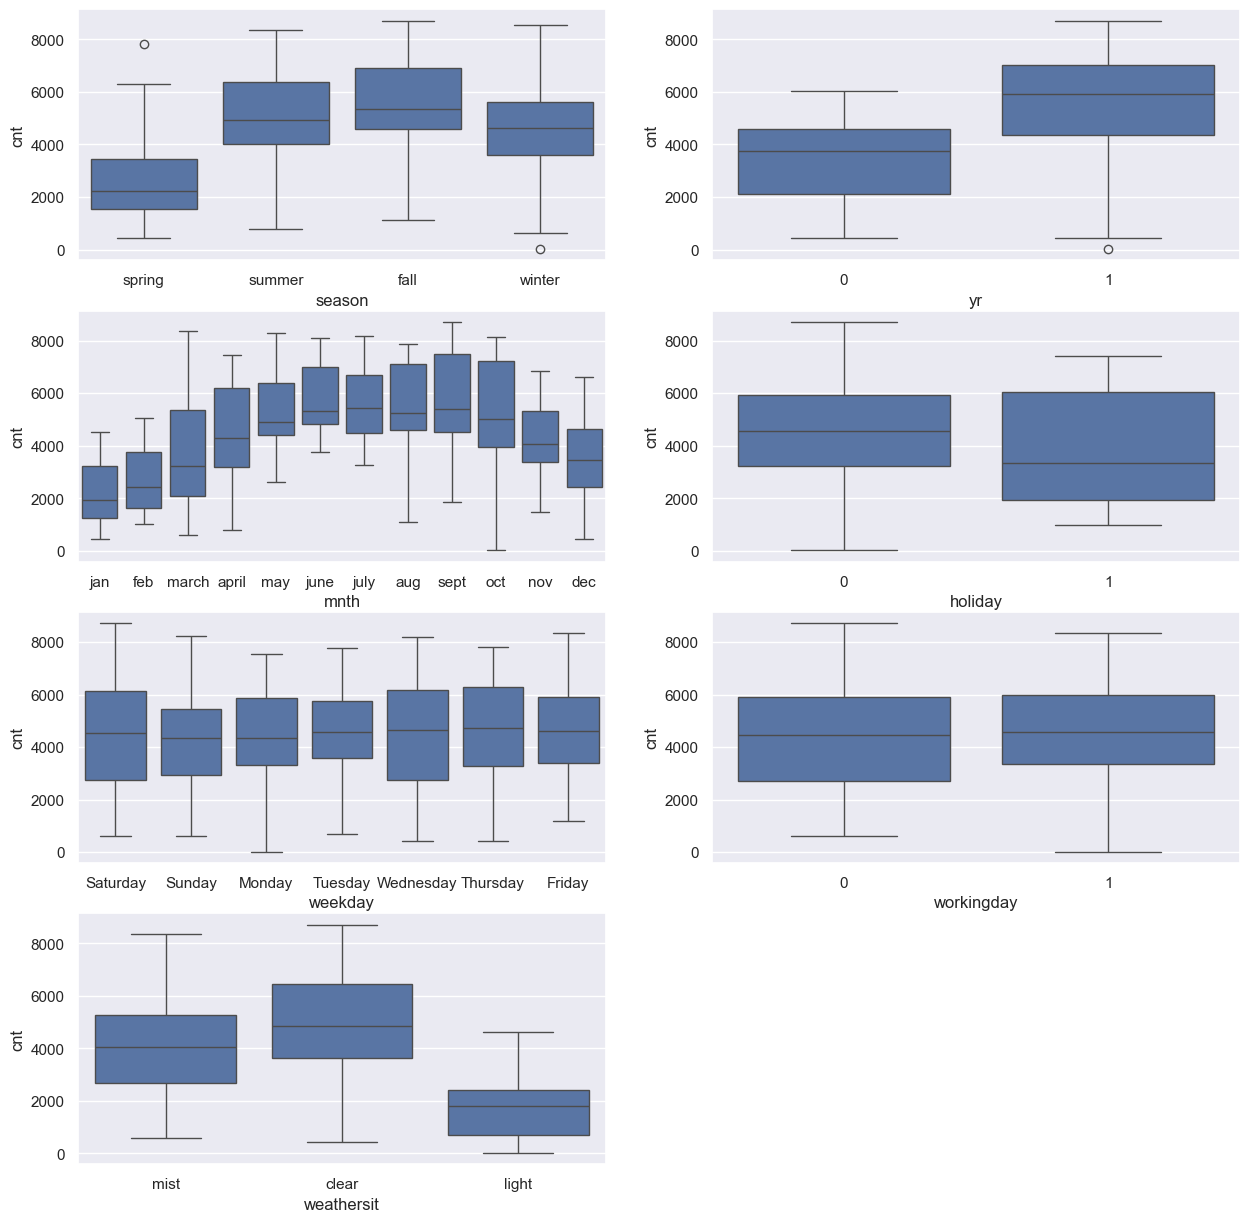

In [128]:
# Boxplot of categorical variables
bike_cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
i=1
for col in bike_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=bike, x=col, y='cnt')
    i=i+1
plt.show()

**Insights:**

- **season**: fall season has the highest demand.
- **year**: bike demand has increased from 2018 to 2019.
- **month**: bike demand increases from Jan to sept and drops after that. dec has least bike demand.
- **holiday**: bike demand decreases during holiday time.
- **weekday**: there is no particular pattern. 
- **workingday**: on workingday, bike demand is little high. 
- **weathersit**: when weathersit is clear, bike demand is high.

#### 3.7 Correlation Analysis

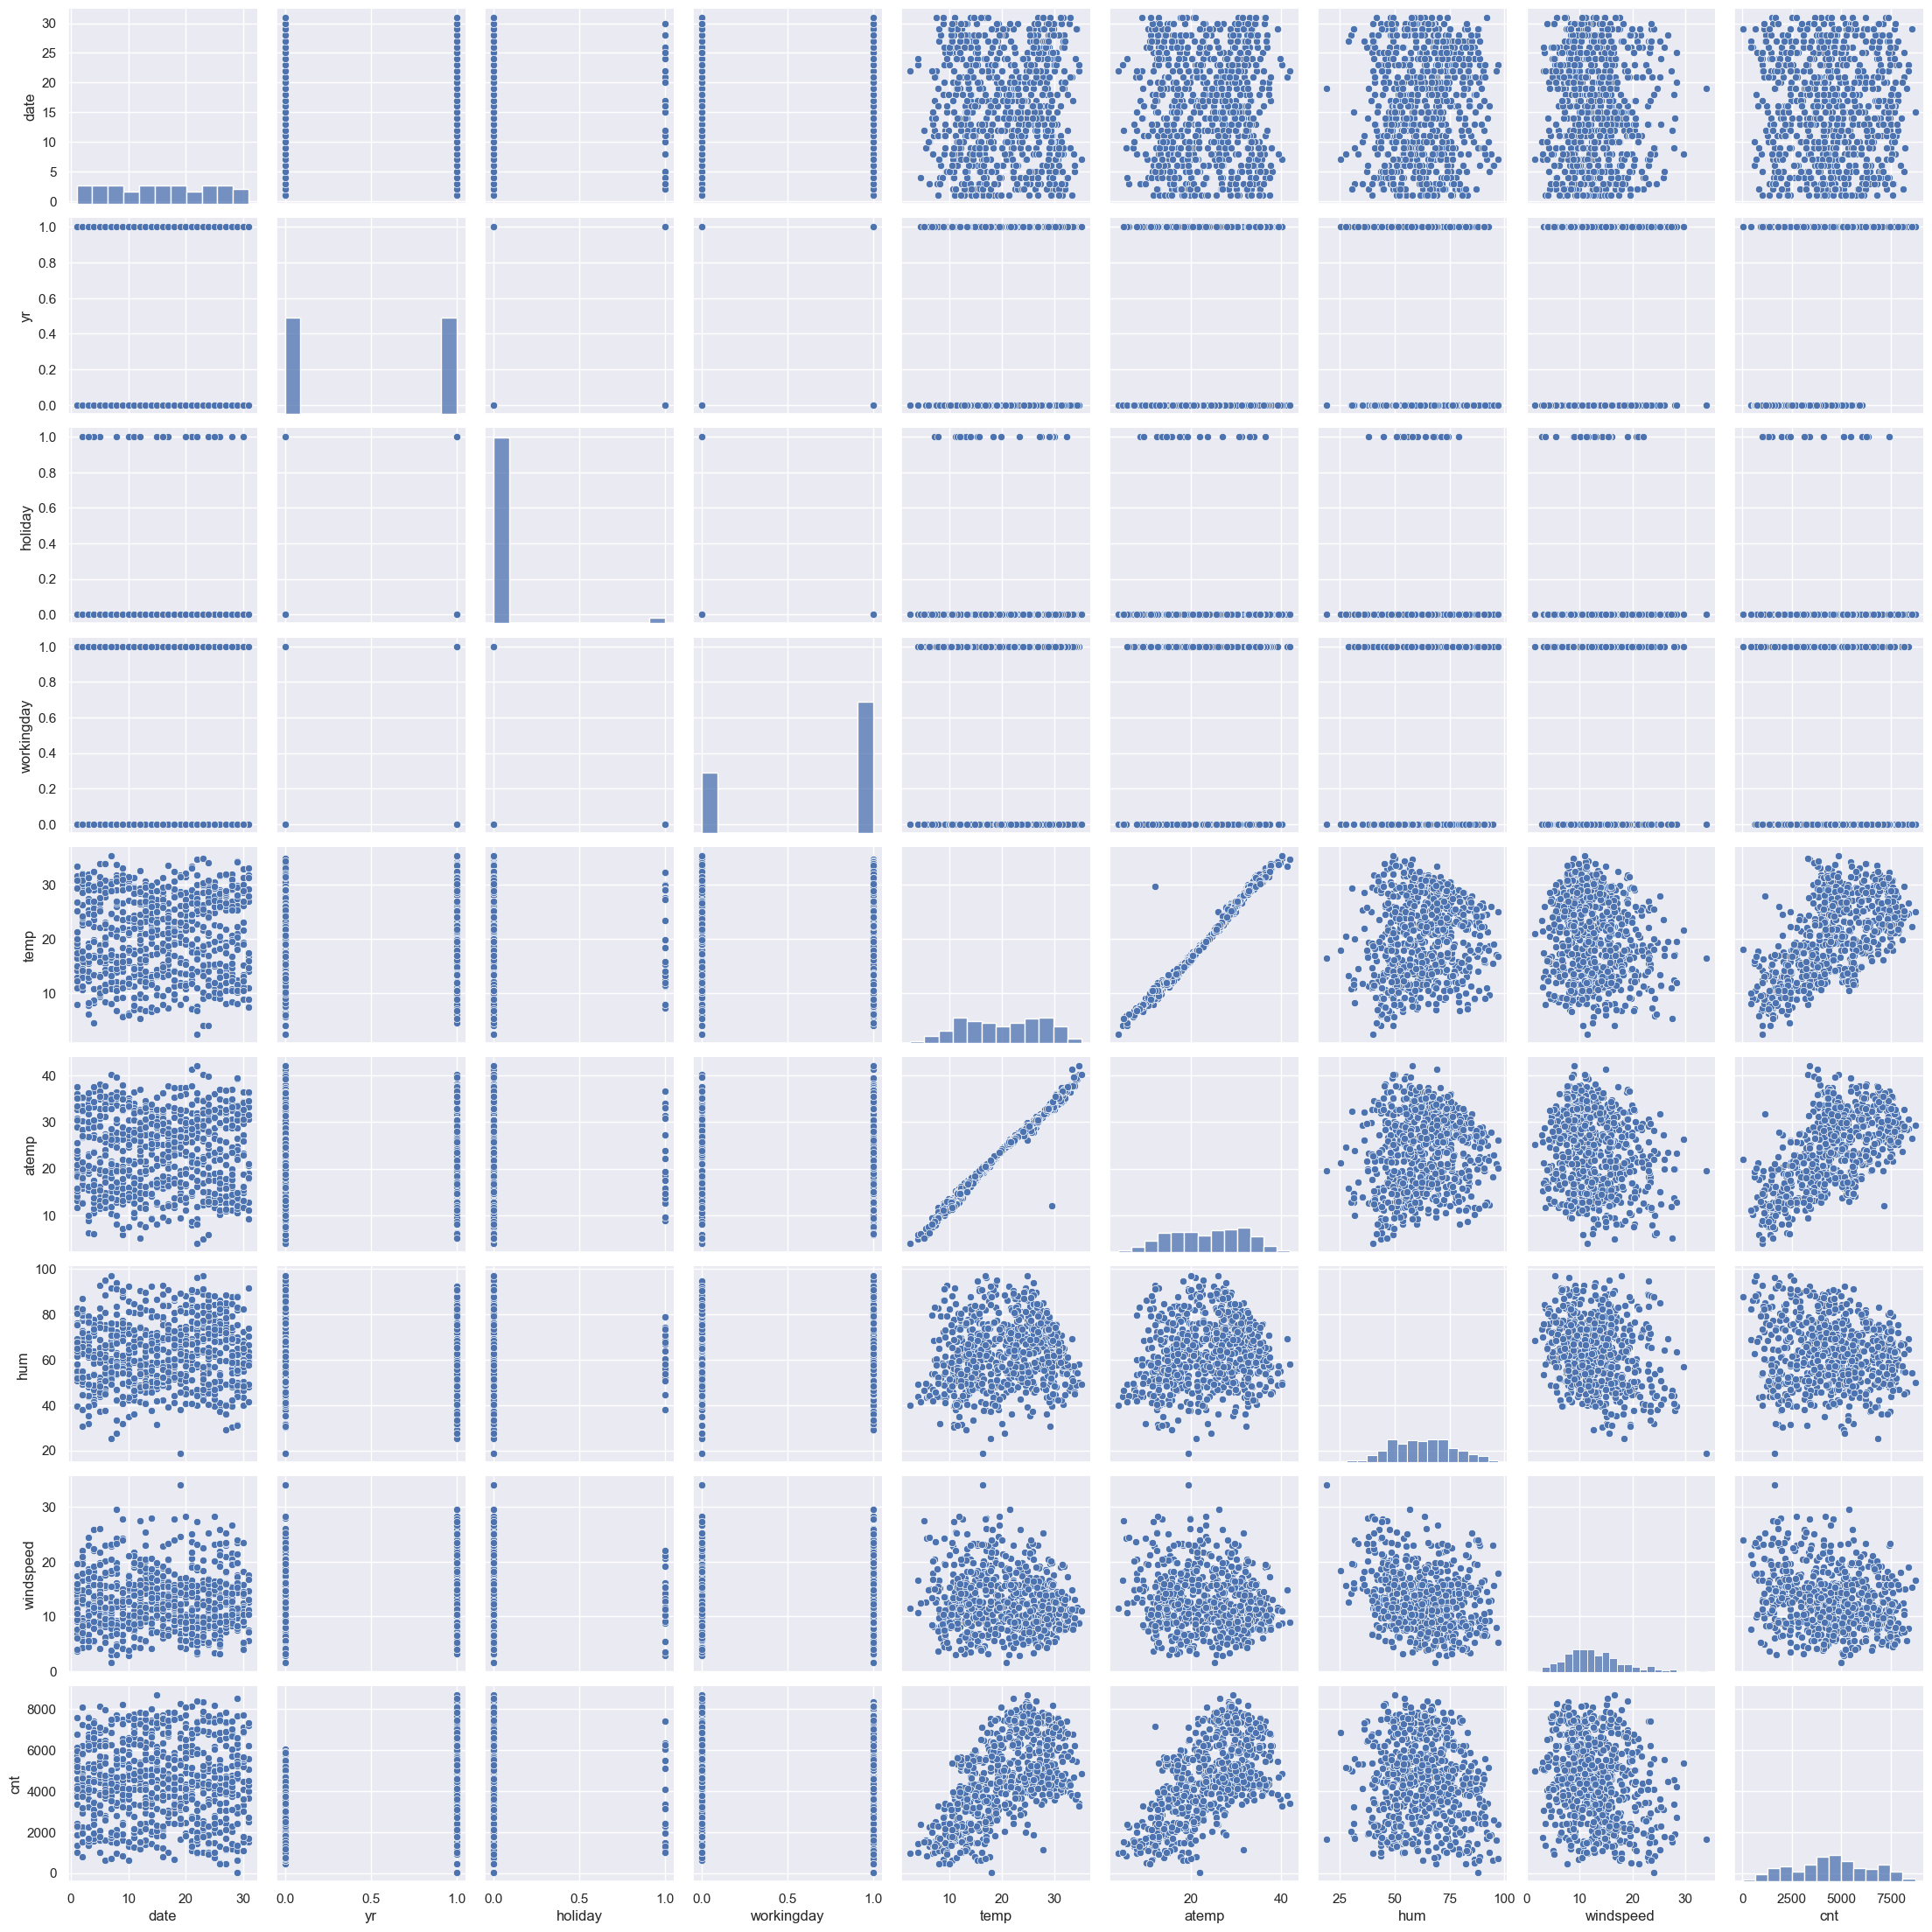

In [129]:
# plot the pairplot of the dataset
sns.pairplot(bike)
plt.show()

**Insights**:

- temp and atemp have correlation with target variable 'cnt'
- temp and atemp are  highly correlated.
- target variable has linear relationship with other variables.

In [131]:
bike.head

<bound method NDFrame.head of      date  season  yr mnth  holiday    weekday  workingday weathersit  \
0       1  spring   0  jan        0   Saturday           0       mist   
1       2  spring   0  jan        0     Sunday           0       mist   
2       3  spring   0  jan        0     Monday           1      clear   
3       4  spring   0  jan        0    Tuesday           1      clear   
4       5  spring   0  jan        0  Wednesday           1      clear   
..    ...     ...  ..  ...      ...        ...         ...        ...   
725    27  spring   1  dec        0   Thursday           1       mist   
726    28  spring   1  dec        0     Friday           1       mist   
727    29  spring   1  dec        0   Saturday           0       mist   
728    30  spring   1  dec        0     Sunday           0      clear   
729    31  spring   1  dec        0     Monday           1       mist   

          temp     atemp      hum  windspeed   cnt  
0    14.110847  18.18125  80.5833  10.74

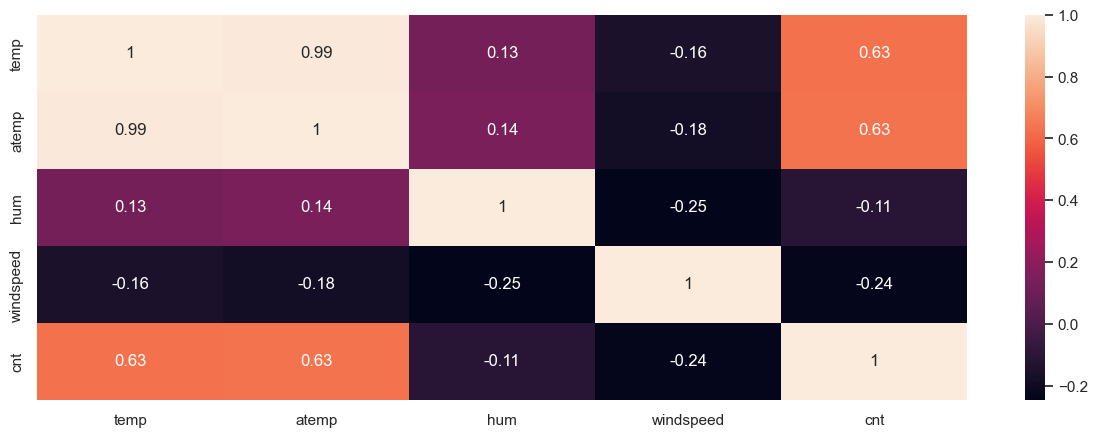

In [133]:
cor=bike[bike_num_col].corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor, annot = True)
plt.show()

**Insights**:
- 'temp' and 'atemp' has the highest correlation with the target variable 'cnt' 

In [134]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


### 4. Linear Regression data preparation

1. Create dummy variable
2. Split the data into train and test dataset
3. Feature Scaling/Normalization
4. Mark target column and feature columns

#### 4.1 Create dummy variable

In [135]:
# creating dummy variable for categorical variable:
category_col = ['mnth', 'season', 'weekday', 'weathersit']
dummy_col = pd.get_dummies(bike[category_col], drop_first=True, dtype=np.uint8)
dummy_col.head(10)

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [136]:
#  Add dummy columns back to the dataset 
bike_new = pd.concat([bike,dummy_col], axis=1)
bike_new = bike_new.drop(columns=category_col)

In [137]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   atemp              730 non-null    float64
 6   hum                730 non-null    float64
 7   windspeed          730 non-null    float64
 8   cnt                730 non-null    int64  
 9   mnth_aug           730 non-null    uint8  
 10  mnth_dec           730 non-null    uint8  
 11  mnth_feb           730 non-null    uint8  
 12  mnth_jan           730 non-null    uint8  
 13  mnth_july          730 non-null    uint8  
 14  mnth_june          730 non-null    uint8  
 15  mnth_march         730 non-null    uint8  
 16  mnth_may           730 non

#### 4.2 Split the data into train and test dataset

In [138]:
#Split the data into Train Test dataset in 70:30 ratio
df_train, df_test = train_test_split(bike_new, test_size=0.3, random_state=100)

In [139]:
print("shape of traing data", df_train.shape)
print("shape of test data", df_test.shape)

shape of traing data (511, 31)
shape of test data (219, 31)


#### 4.3 Feature scaling and standaridization / normalization


In [140]:
scaler = MinMaxScaler()

In [141]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [142]:
#Inspect summary stats for Training set after scaling
df_train.describe()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,15.592955,0.508806,0.025440,0.677104,0.537386,0.513133,0.567931,0.320844,0.514186,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.242661,0.246575,0.248532,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,8.903110,0.500412,0.157613,0.468042,0.225640,0.212202,0.177170,0.169639,0.224737,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.429112,0.431440,0.432585,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.341151,0.332910,0.429180,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,1.000000,0.542077,0.529300,0.570288,0.298098,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.695420,0.414438,0.688737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
df_train.head()

,date,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
653,16,1,0,1,0.509887,0.501133,0.473375,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
576,31,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,3,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
728,30,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
482,28,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


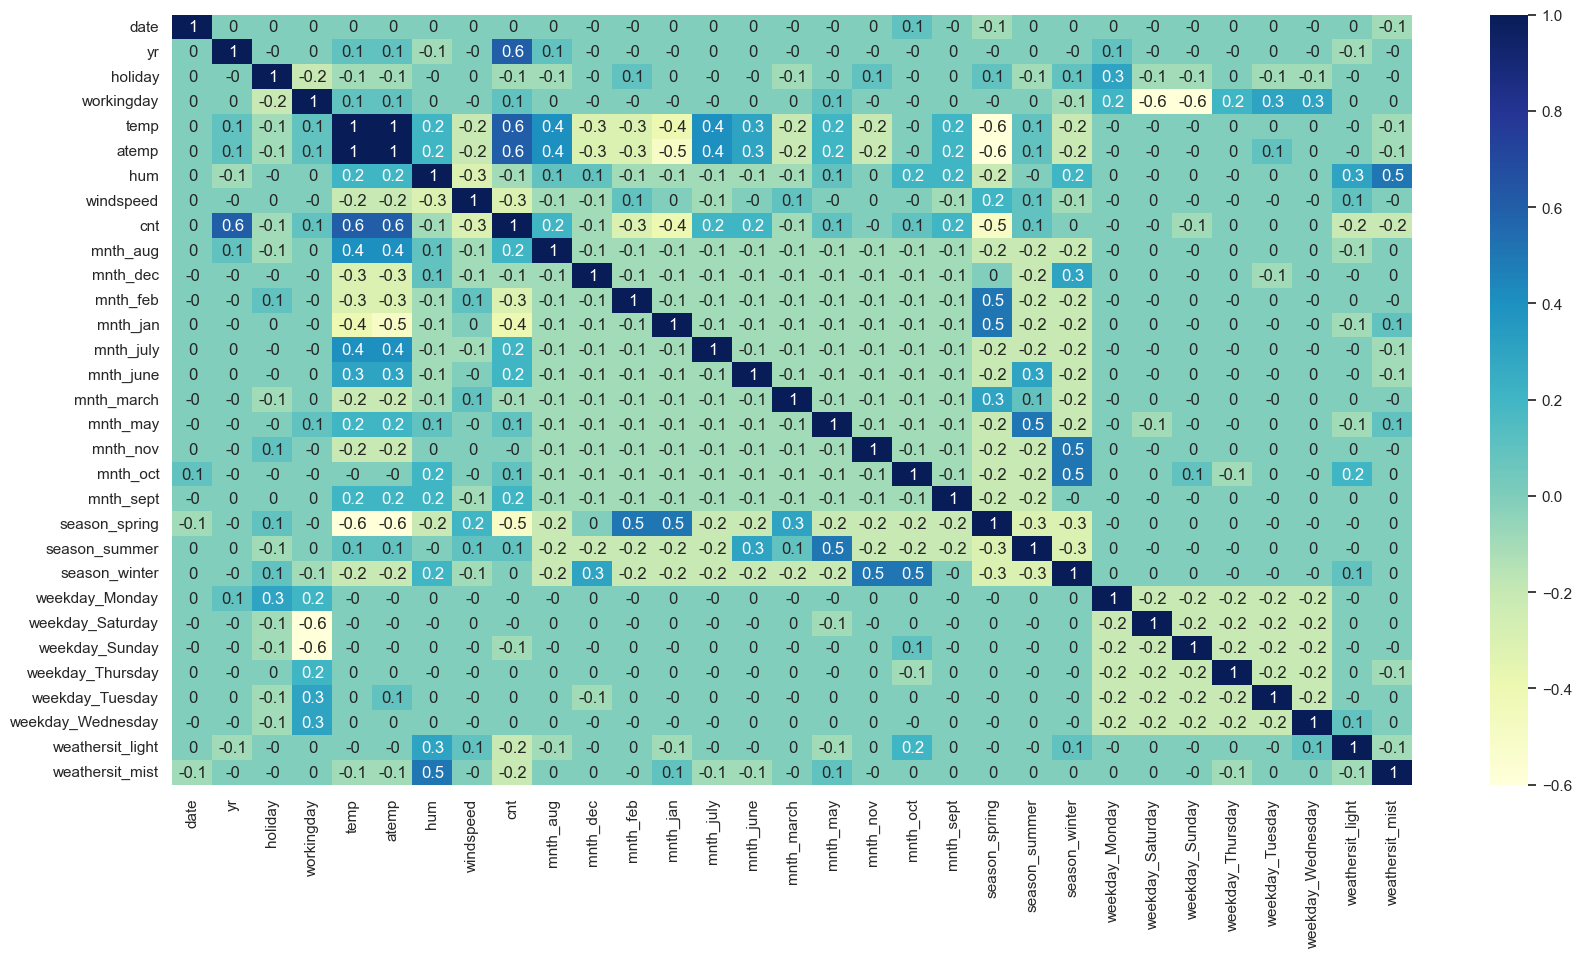

In [144]:
# Correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(),1), annot = True, cmap="YlGnBu")
plt.show()

**Insights**: 

The correlation heatmap confirms previous observation that temp and atemp are highly correlated.

#### 4.4 Mark target and feature columns

In [146]:
y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

### 5. Creating Regression Model

- RFE : Using Recursive Feature Elimination to build linear regression model using sklearn
- Build a Regression model using selected features 

#### 5.1 Use Automated RFE to select Top 15 features

In [147]:
# a Linear Regression model for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [148]:
#Selecting 15 features using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [149]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
29,weathersit_mist,True,1
18,mnth_sept,True,1
21,season_winter,True,1
28,weathersit_light,True,1
23,weekday_Saturday,True,1
24,weekday_Sunday,True,1
11,mnth_jan,True,1
8,mnth_aug,True,1
20,season_summer,True,1
6,hum,True,1


**Insights**:
- RFE method has selected top 15 features. 
- We start the Model Iteration with these features
- We will also use manual building method to find the best performing model.
  

#### 5.2 Build First Model with features selected by RFE

#### 5.2.1 Model 1

In [150]:
#VIF function 
def print_vif(cols):
    df1 = X_train[cols]
    vif_df = pd.DataFrame()
    vif_df['Features'] = df1.columns
    vif_df['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    #return vif_df
    print(vif_df.sort_values(by='VIF',ascending=False))

In [151]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          3.07e-192
Time:                        11:22:55   Log-Likelihood:                 518.94
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -944.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1517      0.019  

**Insights**:
- R-squared: 0.84
- P value of holiday is high
- From VIF table, 'workingday' has highest VIF.

Based on this info, we will remove 'workingday' from our feature selection

#### 5.2.2 Model 2
 - Removing feature 'workingday' from the features selected by RFE 

In [152]:
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          3.07e-192
Time:                        11:25:45   Log-Likelihood:                 518.94
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -944.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2238      0.024  

**Insights**:

- R-squared: 0.84
- P value of weekday_Saturday is high 0.471
    
So, in next iteration we will remove weekday_Saturday because of its high P value.

#### 5.2.3 Model 3: 
- Removing feature weekday_Saturday from the features selected by model 2.
- Basically, this means we now remove feature workingday, weekday_Saturday from RFE feature list.

In [153]:
col = col.drop(['weekday_Saturday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     212.4
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.67e-193
Time:                        11:26:17   Log-Likelihood:                 518.67
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     497   BIC:                            -950.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2259      0.024  

**Observation:**

- R-squared:0.847
- P value of all variable is less than 0.05. 
- So, we check the VIF table. Here, 'hum' variable has very high VIF of 14.75

So, in next model iteration we will remove 'hum' from feature selection

#### 5.2.4 Model 4: 
- Removing feature 'hum' from the features selected by model 3
- Basically, this means we now remove feature workingday, weekday_Saturday, hum from RFE feature list.

In [154]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.59e-190
Time:                        11:26:48   Log-Likelihood:                 508.77
No. Observations:                 511   AIC:                            -991.5
Df Residuals:                     498   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1632      0.019  

**Insights**:

- R-squared: 0.841
- Looking at the VIF table, 'temp' variable has VIF of 5.14

So, in next model iteration, we will remove 'temp'

#### 5.2.5 Model 5:

- Removing feature 'temp' from the features selected by model 4
- Basically, this means we now remove feature workingday, weekday_Saturday, hum, temp from RFE feature list.

In [155]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     110.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          3.53e-126
Time:                        11:27:15   Log-Likelihood:                 353.92
No. Observations:                 511   AIC:                            -683.8
Df Residuals:                     499   BIC:                            -633.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4638      0.017  

**Insights**:

- There is significant drop in adjusted R-squared value from 0.84 to 0.70
- This means that, we should not remove 'temp'. So, we will add temp variable back to selected feature list
- VIF table of model 4 gives temp VIF value as 5.14 
- But from the stats summary, we can see that some of variable have a high p-value. For example: 'mnth_jan' has a p-value of 0.015. We can remove this from feature list.
    
So, in next model we will add 'temp' variable back and remove 'mnth_jan'
    

#### 5.2.6 Model 6: 

- Adding feature 'temp' back into the features selected by model 5
- Removing 'mnth_jan' from the features selected by model 5
- Basically, this means we now remove feature workingday, weekday_Saturday, hum, mnth_jan from RFE feature list.

In [156]:
#col 
col

Index(['yr', 'holiday', 'windspeed', 'mnth_aug', 'mnth_jan', 'mnth_sept',
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist'],
      dtype='object')

In [157]:
#adding 'temp' to col back and removing 'mnth_jan'
col = ['yr', 'holiday', 'windspeed',  'mnth_sept', 'season_spring',
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist','temp']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.19e-189
Time:                        11:30:03   Log-Likelihood:                 504.36
No. Observations:                 511   AIC:                            -984.7
Df Residuals:                     499   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1975      0.029  

**Insights**:

- VIF value of 'temp' has reduced.
- However from the stats summary, we can still see one variable have a p-value greater than zero. For example: season_spring has a p-value of 0.009.

We can remove 'season_spring' from the selected feature list.

#### 5.2.7 Model 7: 

- Removing 'season_spring' from the features selected by model 6
- Basically, this means we now remove feature workingday, weekday_Saturday, hum, mnth_jan, season_spring from RFE feature list.

In [158]:
# removing 'season_spring'
col = ['yr', 'holiday', 'windspeed',  'mnth_sept', 
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist','temp']
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())
print("*******************************************")
print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.21e-189
Time:                        11:30:53   Log-Likelihood:                 500.84
No. Observations:                 511   AIC:                            -979.7
Df Residuals:                     500   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1343      0.017  

**Insights**:
- R-squared value is 0.836
- VIF of temp variable has reduced to 3.73
- All p value are less than 0.05
- VIF of all variable is less than 5.

Both, the VIF and p-values are within an acceptable range. 

Model 7 seems to have VERY LOW Multicollinearity between the predictors and it has the right values for R-Squared, Adjusted R-squared, F-Statistic, Prob (F-statistic). Additionally, the p-values of all the variables is also zero. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

So, using this model for further evaluation.

### 6 Model Evaulation

#### 6.1. Residual analysis

In [159]:
#prediction of training set
y_train_pred = lr_model.predict(X_train_sm)

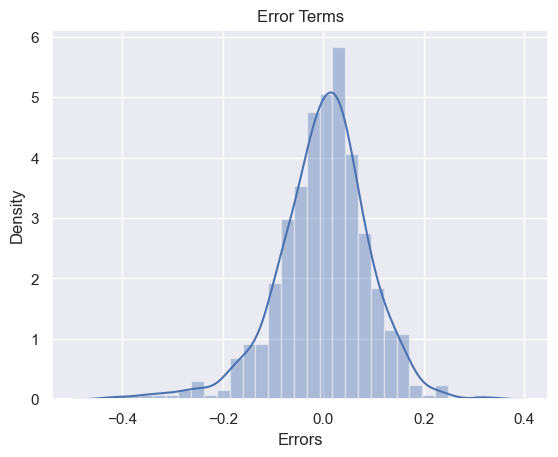

In [160]:
# Plot the histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')                  
plt.xlabel('Errors')  
plt.show()

**Insights**:
- Errors are normally distributed and mean is zero. So, this evaluation passes.

#### 6.2. Dependency among Error terms

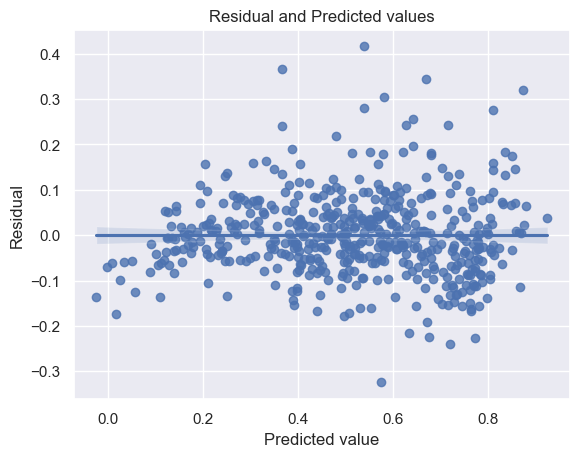

In [161]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

**Insights**:
- There seems to be no relationship between residual and predicted value. So, this evaluation also passes. 

#### 6.3 Homo-scedasticity of error terms 

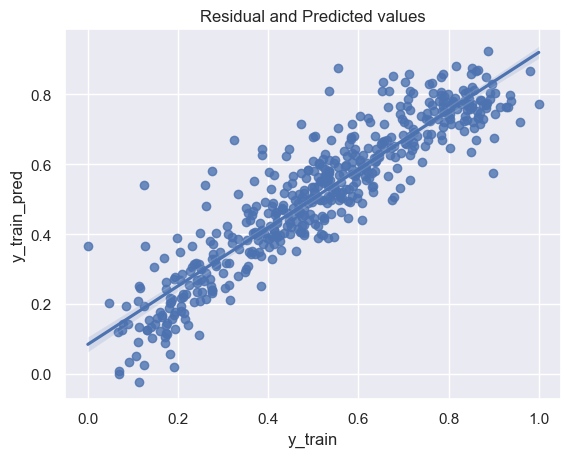

In [162]:
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

**Insights**:
- There is equal variance of predicted value. 
- There is no high concentration of data points when the values are low or high. Concentration is constant across prediction.
- Thus, error terms are homoscedastic.

### 7. Making Predictions Using the Final Model

In [163]:
num_vars =['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [164]:
y_test = df_test.pop('cnt')
X_test = df_test

In [165]:
# selected features 
col = ['yr', 'holiday', 'windspeed',  'mnth_sept', 
       'season_summer', 'season_winter', 'weekday_Sunday', 'weathersit_light',
       'weathersit_mist','temp']
X_test_sm = X_test[col]

In [166]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

In [167]:
#predicting test values
y_pred = lr_model.predict(X_test_sm)

### 8. Model Evaluation

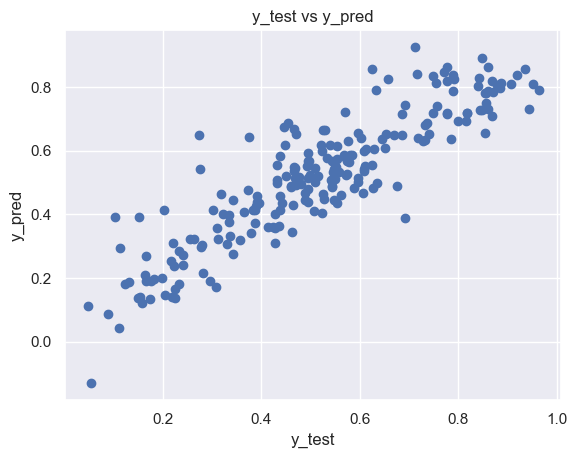

In [168]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

In [169]:
print("r2 score for train data",r2_score(y_train, y_train_pred))

r2 score for train data 0.8364307073076167


In [170]:
from sklearn.metrics import r2_score
print("r2 score for test data",r2_score(y_test, y_pred))

r2 score for test data 0.7958603701267734


In [171]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.21e-189
Time:                        11:32:17   Log-Likelihood:                 500.84
No. Observations:                 511   AIC:                            -979.7
Df Residuals:                     500   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1343      0.017  

##### Final model:

In [172]:
# VIF of significant feature variables 
print_vif(col)

           Features   VIF
9              temp  3.73
2         windspeed  3.09
0                yr  2.01
4     season_summer  1.57
8   weathersit_mist  1.48
5     season_winter  1.39
3         mnth_sept  1.21
6    weekday_Sunday  1.16
7  weathersit_light  1.08
1           holiday  1.04


We can see that the equation of our best fitted line is:

$ cnt = 0.1343 + 0.2333  \times  yr - 0.1072 \times  holiday - 0.1529 \times windspeed + 0.0991 \times mnth sept + 0.0878 \times season summer + 0.1323 \times season winter - 0.0503 \times weekday Sunday  - 0.2890 \times weathersit light - 0.0810 \times weathersit mist + 0.5473 \times temp $

### 9. R-squared score on the test set

In [176]:
#R-squared score on the test set
print("R-squared score on the test set for test data",r2_score(y_test, y_pred))

R-squared score on the test set for test data 0.7958603701267734
